In [1]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"

# Read the CSV into a Pandas DataFrame
suicide_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
suicide_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [3]:
#specify what data to look at in the data set
def create_ethnicity_column(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[1]
        else:
            return splits[0]
    except:
        return "FAILED"
       
def gender(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[0]
        else:
            return "FAILED"
    except:
        return "FAILED"        
suicide_df['Gender'] = suicide_df['STUB_LABEL'].apply(gender)

suicide_df['ETHNICITY'] = suicide_df['STUB_LABEL'].apply(create_ethnicity_column)

asian_df = suicide_df.loc[suicide_df["ETHNICITY"] == "Asian or Pacific Islander"]
asian_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
252,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1950,1,All ages,0.0,NaN,...,Male,Asian or Pacific Islander
253,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1960,2,All ages,0.0,NaN,...,Male,Asian or Pacific Islander
254,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1970,3,All ages,0.0,NaN,...,Male,Asian or Pacific Islander
255,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1980,4,All ages,0.0,10.7,NaN,Male,Asian or Pacific Islander
256,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.14,1981,5,All ages,0.0,9.3,NaN,Male,Asian or Pacific Islander


In [4]:
#filtering the years of data

mask = (asian_df['YEAR'] > 1980) & (asian_df['YEAR'] <= 2018)

filtered_asian_df = asian_df.loc[mask]
filtered_asian_df

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
256,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.140,1981,5,All ages,0.0,9.3,NaN,Male,Asian or Pacific Islander
257,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.140,1982,6,All ages,0.0,8.7,NaN,Male,Asian or Pacific Islander
258,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.140,1983,7,All ages,0.0,9.5,NaN,Male,Asian or Pacific Islander
259,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.140,1984,8,All ages,0.0,9.7,NaN,Male,Asian or Pacific Islander
260,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.140,1985,9,All ages,0.0,9.3,NaN,Male,Asian or Pacific Islander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Asian or Pacific Islander: 65 years an...,5.245,2014,38,65 years and over,5.0,5.2,NaN,Female,Asian or Pacific Islander
4630,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Asian or Pacific Islander: 65 years an...,5.245,2015,39,65 years and over,5.0,5.2,NaN,Female,Asian or Pacific Islander
4631,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Asian or Pacific Islander: 65 years an...,5.245,2016,40,65 years and over,5.0,4.7,NaN,Female,Asian or Pacific Islander
4632,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Female: Asian or Pacific Islander: 65 years an...,5.245,2017,41,65 years and over,5.0,5.3,NaN,Female,Asian or Pacific Islander


In [5]:
# Line graph didnt look astethic pleasing 
# groups = filtered_asian_df.groupby('Gender')
# for name, group in groups:
#     plt.plot(group['YEAR'], group['ESTIMATE'])

# plt.title("Suicide Rates of Asian or Pacific Islanders from 1980-2018")
# plt.xlabel('YEAR')
# plt.ylabel("ESTIMATE")

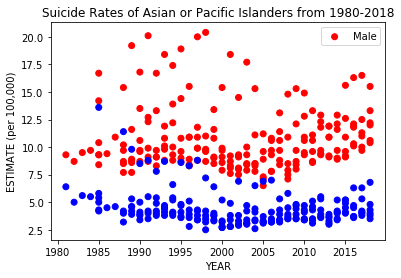

In [38]:
colors = {'Male':'red','Female':'blue'}

plt.scatter(filtered_asian_df['YEAR'], filtered_asian_df['ESTIMATE'], c=filtered_asian_df['Gender'].map(colors))

plt.legend(colors)

plt.title("Suicide Rates of Asian or Pacific Islanders from 1980-2018")
plt.xlabel('YEAR')
plt.ylabel("ESTIMATE (per 100,000)")
plt.show()

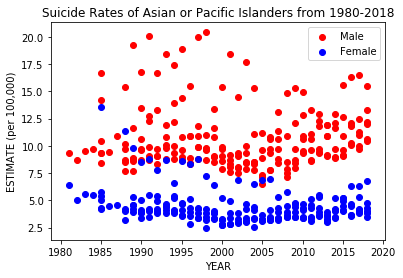

In [43]:
male_df = filtered_asian_df.loc[filtered_asian_df["Gender"]=="Male"]
female_df = filtered_asian_df.loc[filtered_asian_df["Gender"]=="Female"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(male_df['YEAR'], male_df['ESTIMATE'], c='red', label = 'Male')
ax1.scatter(female_df['YEAR'], female_df['ESTIMATE'], c='blue', label = "Female")
plt.legend()


plt.title("Suicide Rates of Asian or Pacific Islanders from 1980-2018")
plt.xlabel('YEAR')
plt.ylabel("ESTIMATE (per 100,000)")
plt.show()

